<a href="https://colab.research.google.com/github/shyandsy/ModernComputerVisionWithPyTorch/blob/main/Pytorch%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%AE%9E%E8%B7%B5_chapter3_pytorch%E6%9E%84%E5%BB%BA%E6%B7%B1%E5%BA%A6%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chapter3 pytorch构建深度神经网络
本章将学习使用神经网络进行图像分类
本质上，我们将学习如何实现对图像的表示，以及如何通过对超参数的调整来理解这些超参数对神经网络的影响

为了提高pytorch的熟练度，我专门在每一段代码中都完整实现所有依赖函数。第一遍几乎抄书，第二遍可以熟悉个7788，第三遍我争取自己独立些


## 1. 表示图像
图像由像素数组成。像素是构成图像的最小元素。

在灰度图中，每个像素的取值在0-255之间。0表示黑，255表示白。

彩色图像中的像素则是一个三维向量，比如RGB图像，向量中的每个分量对应R(红色)G(绿色)B(蓝色)

一副图像包含height * width * c的像素，height表示行数，width表示烈属，c表示通道数。c为3表示彩色图像；c=1表示灰度图

我们可以将图片表示为标量数组(灰度图)，或者数组的数组(彩色图)。将图片转换为结构化的数组格式，我们就可以用多种技术对图片进行数学处理了: 比如分类，检测，分割
(真tm太棒了！！！！)

In [ ]:
!pip install opencv-python
!pip install ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import cv2, matplotlib.pyplot as plt

TypeError: Image data of dtype object cannot be converted to float

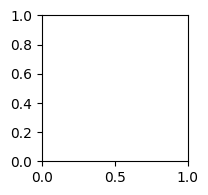

In [ ]:
img = cv2.imread("Hemanvi.jpeg")

plt.subplot(2, 3, 1)
plt.imshow(img)

# crop image
img = img[50:250, 40:240]

# 转灰度图，并绘制
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(2, 3, 2)
plt.imshow(img_gray, cmap='gray')

# 转 25*25 数组，并绘制
img_gray_small = cv2.resize(img_gray, (25, 25))
plt.subplot(2, 3, 3)
plt.imshow(img_gray_small, cmap='gray')

# 右下角3*3数组
crop = img[-3:, -3:]
print(f'右下角3*3矩阵: {crop}')

## 2. 为什么要用神经网络进行图像分析
传统计算机视觉会为每一幅图创建一些特征，然后使用这些特征作为输入。
一些不通过神经网络训练就可以获得的成果：
- 直方图特征： 对于一些任务，比如自动亮度调节或者夜视系统，了解图片中的光照分布很重要。
- 边角特征：对于图像分割任务，找到每个人对映的像素很重要，首先提取边缘是有意义的，因为一个人的边界知识边缘的集合，另一些任务，比如图像配准，对关键点的检测是至关重要的
- 色彩分离特征：在汽车自动驾驶系统的交通灯检测等任务重，系统了解交通灯显示的颜色非常重要
- 图像梯度特征：理解颜色在像素级熵的变化可能很重要。不同的纹路给出不同的梯度，以为这可以用做纹理检测器。找到梯度是边缘检测的先决条件

以上特征知识一小部分，类似特征很多。

创建这些特征的问题在于，你需要的是图像和信号分析方面的专家，应充分了解什么样特征最适合解决什么问题。即便如此，也不能保证这样的专家能找到正确的特征组合；即便找到了，也不能保证这样的组合在将来未见过的场景中能够发挥作用。。。
（离谱）




## 3 & 4.为图像分类准备数据，训练神经网络
本章处理单个数据集Fashion MNIST数据集

60000张图，28*28像素，10个类别

本方法采用1000个神经元

问题输入: n张图，每张图28*28, (n, 28*28)

问题输出: 10个分类

第一层
- 输入: (n, 28*28)
- W^T shape: (28*28, 1000)
- 输出: (n, 1000)

输出层
- 输入: (n, 1000)
- W^T shape: (1000, 1)
- 输出: (n, 1)

算法效果，最后准确率大概15%。远远达不到要求

device: cuda


100%|██████████| 26.4M/26.4M [00:02<00:00, 10.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 178kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.29MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]


tr_images & tr_targets
X - torch.Size([60000, 28, 28])
Y - torch.Size([60000])
	
Y - Unique tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
0
1
2
3
4


/tmp/ipython-input-2-3291007301.py:175: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


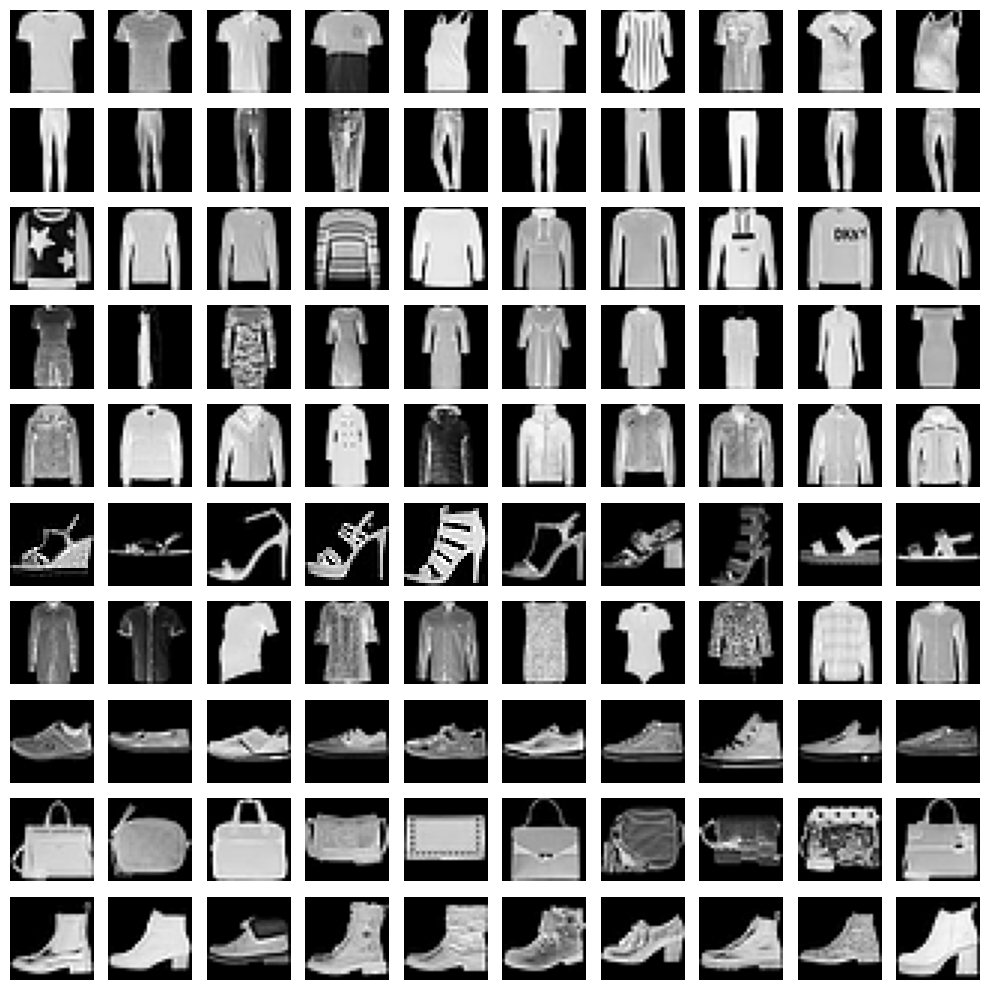

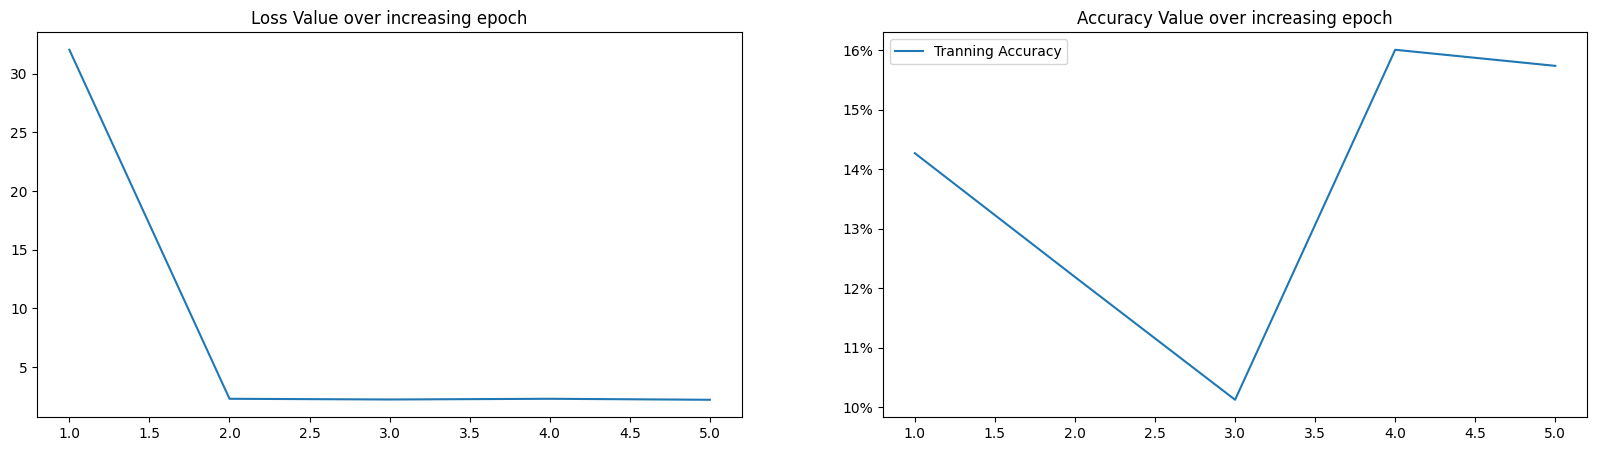

In [ ]:
#%pdb on

#import pdb
#pdb.set_trace()
from torchvision import datasets
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available() else 'cpu'
print(f'device: {device}')

def prepare_data():
  # 下载数据集
  data_folder = './data/FMNIST'
  fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

  # 训练图像和对应的标签
  tr_images = fmnist.data
  tr_targets = fmnist.targets

  # 检查正在处理的张量
  # 60000张图，28*28像素，10个类别
  unique_values = tr_targets.unique()
  print('tr_images & tr_targets')
  print(f'X - {tr_images.shape}')
  print(f'Y - {tr_targets.shape}\n\t')
  print(f'Y - Unique {unique_values}')
  print(f'TASK:\n\t{len(unique_values)} classification')
  print(f'UNIQUE CLASSES:\n\t{fmnist.classes}')

  # 为所有可能的类别分别给出10个随机图片样本
  R, C = len(tr_targets.unique()), 10 # 10*10

  # 随机选样本并输出
  fig, ax = plt.subplots(R, C, figsize=(10,10))
  for label_class, plot_row in enumerate(ax):
    # index array for element = label_class
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
      plot_cell.grid(False)
      plot_cell.axis('off')
      ix = np.random.choice(label_x_rows)
      x, y = tr_images[ix], tr_targets[ix]
      plot_cell.imshow(x, cmap='gray')
  plt.tight_layout()
  return tr_images, tr_targets

# 数据集类
class FMNISTDataset(Dataset):
  def __init__(self, x, y):
    super().__init__()
    x = x.float()
    # shape (60000, 28, 28) => (60000, 784)
    x = x.view(-1, 28*28)
    self.x, self.y = x, y
  def __getitem__(self, ix):
    x, y = self.x[ix], self.y[ix]
    return x.to(device), y.to(device)
  def __len__(self):
    return len(self.x)

# 训练数据加载器
def get_data(tr_images, tr_targets):
  train = FMNISTDataset(tr_images, tr_targets)
  trn_dl = DataLoader(train, batch_size=32, shuffle=True)
  return trn_dl

# 定义模型 Y = XW^T + b
# 隐藏层1000个神经元
def get_model():
  model = nn.Sequential(
      # 输入n条数据, shape（n, 28*28), 所以WT必须是(28*28, m),
      # 这里选取1000个神经元, m = 1000
      # 所以 (28*28, 1000)
      # 该层输出 (n, 1000)
      nn.Linear(28*28, 1000),
      nn.ReLU(),
      # 输入 (n, 1000)
      # 输出10个分类 (n, 10)
      nn.Linear(1000, 10)
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = SGD(model.parameters(), lr=1e-2)
  return model, loss_fn, optimizer

# 定义一个方法，在一个批次数据熵进行训练
def train_batch(x, y, model, opt, loss_fn):
  """
  TODO: 这个用法后面dropout在讨论
  """
  model.train()

  # call model on batch of inputs
  prediction = model(x)

  # 损失计算
  batch_loss = loss_fn(prediction, y)

  # based on forward pass in model(x)
  # computer all the gradient of model.parameters()
  batch_loss.backward()

  # apply new-weights = f(old-weights,  old-weight-gradients)
  # f是optimizer
  optimizer.step()

  # 清空梯度内存准备下一批次计算
  optimizer.zero_grad()

  return batch_loss.item()


@torch.no_grad() # 不需要自动求梯度
def accuracy(x, y, demol):
  """
  TODO: 这个用法后面dropout在讨论
  """
  model.eval()
  prediction = model(x)
  max_value, argmaxes = prediction.max(-1)
  is_correct = argmaxes == y
  return is_correct.cpu().numpy().tolist()


tr_images, tr_targets = prepare_data()
trn_dl = get_data(tr_images, tr_targets)
model, loss_fn, optimizer = get_model()

# 准确度，损失列表
losses, accracies = [], []

# 迭代
for epochs in range(5):
  print(epochs)

  # 当前批次的损失和准确率
  epoch_losses, epoch_accuracies = [], []

  # 使用DataLoader创建一批训练数据
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)
    epoch_losses.append(batch_loss)

  # 求平均损失
  epoch_loss = np.array(epoch_losses).mean()

  # 计算所有批次结束训练时所获的预测的准确度
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    is_correct = accuracy(x, y, model)
    epoch_accuracies.extend(is_correct)

  # 平均准确率
  epoch_accrarcy = np.mean(epoch_accuracies)

  losses.append(epoch_loss)
  accracies.append(epoch_accrarcy)

# 展示损失和准确度关于轮数的变化
epochs = np.arange(5)+1
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('Loss Value over increasing epoch')
plt.plot(epochs, losses, label='Tranning Loss')
plt.subplot(1, 2, 2)
plt.title('Accuracy Value over increasing epoch')
plt.plot(epochs, accracies, label='Tranning Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()






In [ ]:
import numpy as np
a = np.array([1,2,3,4,1,2,3,4])
print(np.where(a==4))
print(np.where(a==4)[0])

a = torch.tensor([
    [1,2,3],
     [4,5,6],
      [7,8,9]
])
print(a.view(9))
print(a.view(-1, 9))

(array([3, 7]),)
[3 7]
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])


## 5.缩放数据集提升模型准确率
对每个输入数值初一数据集中可能的最大值，将自变量限制为[0,1]区间的值。0对应0，1对应255

结果上看，准确率即可达到85%+，已经远好于上面14%左右的准确率

为什么数据缩放有效？

$sigmod = \frac{1}{1+e^{-x}}$

因为对于[0,1]区间的x，上面这个函数的区分度比较高。参考p74函数值表。这里就不画图了

device: cuda
epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4


/tmp/ipython-input-3-2428718345.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


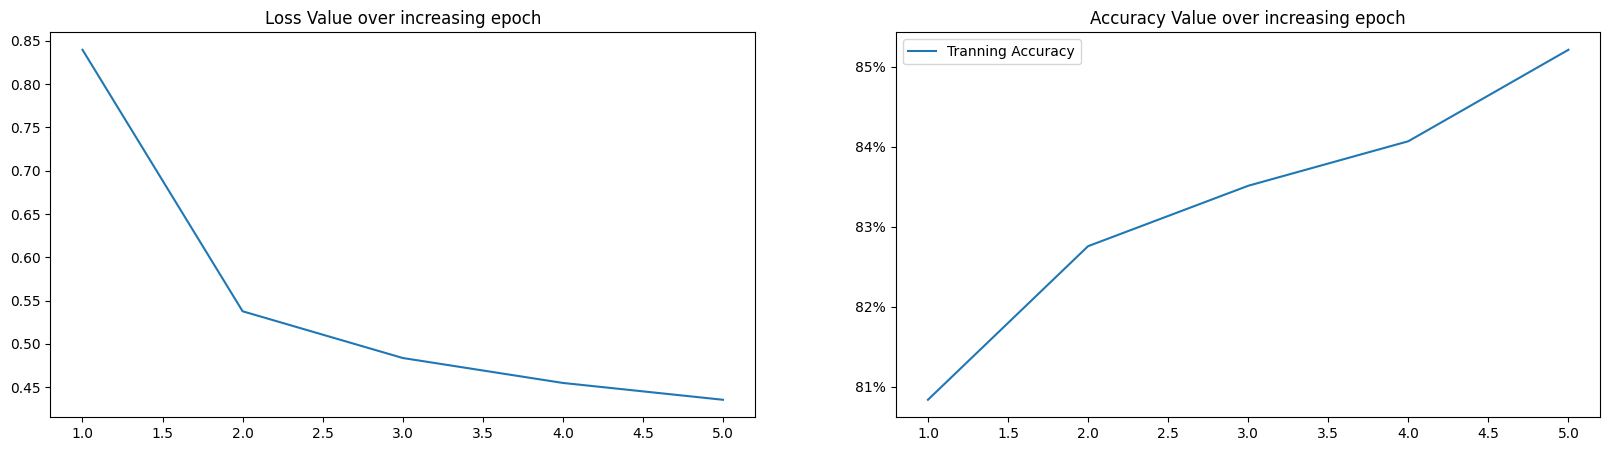

In [ ]:
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available() else 'cpu'
print(f'device: {device}')

# 数据下载
data_folder = './data/FMNIST'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

# 数据
tr_images = fmnist.data
tr_targets = fmnist.targets

# 修改FMNISTDataset，将数据进行缩放
class FMNISTDataset(Dataset):
  # x shape: (n,28,28), y shape: (1, n)
  def __init__(self, x, y):
    super().__init__()
    x = x.float() / 255.0
    x = x.view(-1, 28*28)
    self.x, self.y = x, y
  def __getitem__(self, ix):
    x, y = self.x[ix], self.y[ix]
    return x.to(device), y.to(device)
  def __len__(self):
    return len(self.x)

def get_data(tr_images, tr_targets):
  ds = FMNISTDataset(tr_images, tr_targets)
  trn_dl = DataLoader(ds, batch_size=32, shuffle=True)
  return trn_dl

def get_model():
  model = nn.Sequential(
      nn.Linear(28*28, 1000),
      nn.ReLU(),
      nn.Linear(1000, 10)
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  optimizer = SGD(model.parameters(), lr=1e-2)
  return model, loss_fn, optimizer

# 批次训练
def train_batch(x, y, model, optimizer, loss_fn):
  model.train()
  prediction = model(x)
  batch_loss = loss_fn(prediction, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
  model.eval()
  prediction = model(x)
  max_values, argmaxes = prediction.max(-1)
  is_correct = argmaxes == y
  return is_correct.cpu().numpy().tolist()

trn_dl = get_data(tr_images, tr_targets)
model, loss_fn, optimizer = get_model()
losses, accuracies = [], []
for epoch in range(5):
  print(f'epoch: {epoch}')
  epoch_losses, epoch_accuracies = [], []
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)
    epoch_losses.append(batch_loss)
  epoch_loss = np.array(epoch_losses).mean()
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    is_correct = accuracy(x, y, model)
    epoch_accuracies.extend(is_correct)
  epoch_accuracy = np.mean(epoch_accuracies)
  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

# 展示损失和准确度关于轮数的变化
epochs = np.arange(5)+1
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('Loss Value over increasing epoch')
plt.plot(epochs, losses, label='Tranning Loss')
plt.subplot(1, 2, 2)
plt.title('Accuracy Value over increasing epoch')
plt.plot(epochs, accuracies, label='Tranning Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.legend()


## 6.0 准备点工具，输出对比图和获取训练数据，不然重复代码太多，要累死了
先写个mateplot用来输出训练过程状态吧，这玩意儿反复写没什么意义，封装成函数，减少无用功。毕竟不能像某家公司中国it这帮傻逼leader一样，天天演
- show_result:展示训练过程中的loss和accuracy变化
- get_data(batch_size, is_scale: bool): 用来获取数据，is_scale表示是否缩放



In [ ]:
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

"""
epochs: 训练轮数
train_losses
val_losses
train_accuracies
val_accuracies
"""
def show_result(epochs, train_losses, val_losses, train_accuracies, val_accuracies, *, batch_size: int):
  epochs = np.arange(epochs) + 1

  print("---------------------------------------------")
  print(f"All epochs: ", epochs)
  result = ", ".join([f'{loss:.3f}' for loss in train_losses])
  print(f"All Training Loss: {result}")
  result = ", ".join([f'{loss:.3f}' for loss in val_losses])
  print(f"All ValLosses: {result}")
  result = ", ".join([f'{accuracy*100:.3f}%' for accuracy in train_accuracies])
  print(f"All Training Accuracy: {result}")
  result = ", ".join([f'{accuracy*100:.3f}%' for accuracy in val_accuracies])
  print(f"All ValAccuracy: {result}")

  print("---------------------------------------------")

  print(f"Training Loss: {train_losses[-1]:.3f}, ValLosses: {val_losses[-1]:.3f}")
  print(f"Training Accuracy: {train_accuracies[-1]*100:.3f}%, ValAccuracy: {val_accuracies[-1]*100:.3f}%")

  print("---------------------------------------------")

  # 展示损失和准确度关于轮数的变化

  plt.figure(figsize=(20, 5))
  #plt.title(f'batchsize {batch_size} epochs {len(epochs)} optim {type(optimizer).__name__}')
  plt.subplot(1, 2, 1)
  y_max = max(max(train_losses), max(val_losses))
  y_min = min(min(train_losses), min(val_losses))
  offset = (y_max - y_min)*0.1
  plt.plot(epochs, train_losses, 'bo', label='Tranning Loss')
  for i in range(len(epochs)):
    x, y = i, train_losses[i]
    plt.annotate(f"{y:.3f}", (x, y), textcoords="offset points", xytext=(0, offset),ha='center',color='b', fontsize=16)
  plt.plot(epochs, val_losses, 'r', label='Val Loss')
  for i in range(len(epochs)):
    x, y = i, val_losses[i]
    plt.annotate(f"{y:.3f}", (x, y), textcoords="offset points", xytext=(0, -offset),ha='center',color='r', fontsize=16)
  plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
  plt.title(f'Trn and Val Loss - batchsize {batch_size} epochs {len(epochs)} optim {type(optimizer).__name__}')
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc='upper left')
  y_max = max(max(train_losses), max(val_losses)) + 0.1
  y_min = min(min(train_losses), min(val_losses)) - 0.1
  plt.ylim(top=y_max+offset*2, bottom=y_min-offset*2)
  x_max = len(epochs) + 1  # 预留15点空间
  plt.xlim(left=1, right=x_max)
  plt.grid('off')

  plt.subplot(1, 2, 2)
  y_max = max(max(train_accuracies), max(val_accuracies))
  y_min = min(min(train_accuracies), min(val_accuracies))
  offset = (y_max - y_min)*0.1
  plt.title(f'Trn and Val Accuracy - batchsize {batch_size} epochs {len(epochs)}')
  plt.plot(epochs, train_accuracies, 'bo', label='Tranning Accurary')
  for i in range(len(epochs)):
    x, y = i, train_accuracies[i]
    plt.annotate(f"{y*100:.3f}%", (x, y), textcoords="offset points", xytext=(0, offset),ha='center',color='b', fontsize=16)
  plt.plot(epochs, val_accuracies, 'r', label='Val Accurary')
  for i in range(len(epochs)):
    x, y = i, val_accuracies[i]
    plt.annotate(f"{y*100:.3f}%", (x, y), textcoords="offset points", xytext=(0, -offset),ha='center',color='r', fontsize=16)
  plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
  plt.title('Accuracy Value over increasing epoch')
  plt.xlabel("Epoch")
  plt.ylabel("Accurary")
  ax = plt.gca()
  yticks = ax.get_yticks()
  ax.set_yticks(yticks)
  ax.set_yticklabels([f'{y*100:.0f}' for y in yticks])
  plt.legend(loc='upper left')
  plt.ylim(top=y_max+offset*2, bottom=y_min-offset*2)
  x_max = len(epochs) + 1  # 预留15点空间
  plt.xlim(left=1, right=x_max)
  plt.grid('off')

  plt.show()

class FMNISTDataset(Dataset):
  # x: (n, 28, 28)
  # y: (1, n)
  def __init__(self, x, y, is_scale: bool):
    super().__init__()
    if is_scale:
      x = x.float()/255.0 # range to [0,1]
    else:
      x = x.float()
    x = x.view(-1, 28*28) # dim to x: (n, 28*28)
    self.x = x
    self.y = y
  def __getitem__(self, ix):
    x, y = self.x[ix], self.y[ix]
    return x.to(device), y.to(device)
  def __len__(self):
    return len(self.x)


device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available() else 'cpu'
print(f'device: {device}')

data_folder = './data/FMNIST'

# 训练数据下载
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

# 验证数据
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 获取数据的函数
def get_data(*, batch_size: int, is_scale: bool):
  train = FMNISTDataset(tr_images, tr_targets, is_scale)
  trn_dl = DataLoader(train, batch_size=batch_size, shuffle=True)
  val = FMNISTDataset(val_images, val_targets, is_scale)
  val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
  return trn_dl, val_dl

device: cuda


## 6.1 不同批大小(Batch Size)的影响
***batch size***: 每批训练数据包含的数据量，即每轮训练使用的数据集大小。

上一节中，每个batch包含32个数据点，这导致每轮权重更新数据较大。
- 原因分析:每个epoch，会对每个批次进行训练，并更新权重。那么，需要执行60000/32约1875次，也就有1875个权重更新。

此外，没有考虑模型在位置数据集(验证集)上的性能。

本节探讨以下内容
- batch_size = 32, 训练和验证数据的损失值和准确度
- batch_size = 1000, 训练和验证数据的损失值和准确度
- batch_size = 10000, 训练和验证数据的损失值和准确度

#### 实验结果


##### v0.1结果分析
| 数据 | batch size | train loss | val loss | trn accuracy | val accuracy |
|:--:|:----------:|:----------:|:--------:|:------------:|:------------:|
| 缩放 |     32     |   0.391   |  0.441   |    86.933%    |    84.770%   |
| 缩放 |    1000    |   0.292   |  0.385  |    88.977%    |    86.530%    |
| 缩放 |   10000    |   0.287   |  0.384  |    89.065%    |    86.580%    |

***TODO***:

这个结果数据和书上论述不符！！！interesting!!!书上说，轮数较少时候，较小的batchsize通常有助于达到最佳准确度。实验结果看起来和这个描述不太一致

哦！！！我是个傻逼。。。没有重新初始化model对象，让每次执行之间产生了关联

***解决方案***:

执行start之前，必须重新初始化model。model里面是有权重的
```python
model, loss_fn, optimizer = get_model(1e-2)

# batch_size: 32, epochs = 5
start(model, optimizer, loss_fn, 32, 5)

# 重新初始化model
model, loss_fn, optimizer = get_model(1e-2)
start(model, optimizer, loss_fn, 1000, 5)
```

***问题原因***
```python
model, loss_fn, optimizer = get_model(1e-2)

# batch_size: 32, epochs = 5
start(model, optimizer, loss_fn, 32, 5)

# !!!! 问题就在这里，
# model中的paramaters已经是计算过的了，如果不重新初始化，其实这个训练是基于上一次结果继续训练。毫无意义！！！
# batch_size: 1000, epochs = 5
start(model, optimizer, loss_fn, 1000, 5)
```


##### v0.2结果分析

| 数据 | batch size | train loss | val loss | trn accuracy | val accuracy |
|:--:|:----------:|:----------:|:--------:|:------------:|:------------:|
| 缩放 |     32     |   0.389   |  0.448   |    86.983%    |    85.070%   |
| 缩放 |    1000    |   0.312   |  0.365  |    88.980%   |   86.940%    |
| 缩放 |   10000    |   0.541   | 0.539  |    82.210%    |    81.010%    |

在5轮训练之后，

batch size=32可以达到85.070%，

batch size=10000时候反而效果更差了,81.010%

2025-06-27 08:44:43
---------------------------------------------
All epochs:  [1 2 3 4 5]
All Training Loss: 0.533, 0.428, 0.402, 0.396, 0.385
All ValLosses: 0.500, 0.456, 0.482, 0.473, 0.448
All Training Accuracy: 84.373%, 85.795%, 86.303%, 86.270%, 86.902%
All ValAccuracy: 82.750%, 83.800%, 84.310%, 84.360%, 84.820%
---------------------------------------------
Training Loss: 0.385, ValLosses: 0.448
Training Accuracy: 86.902%, ValAccuracy: 84.820%
---------------------------------------------


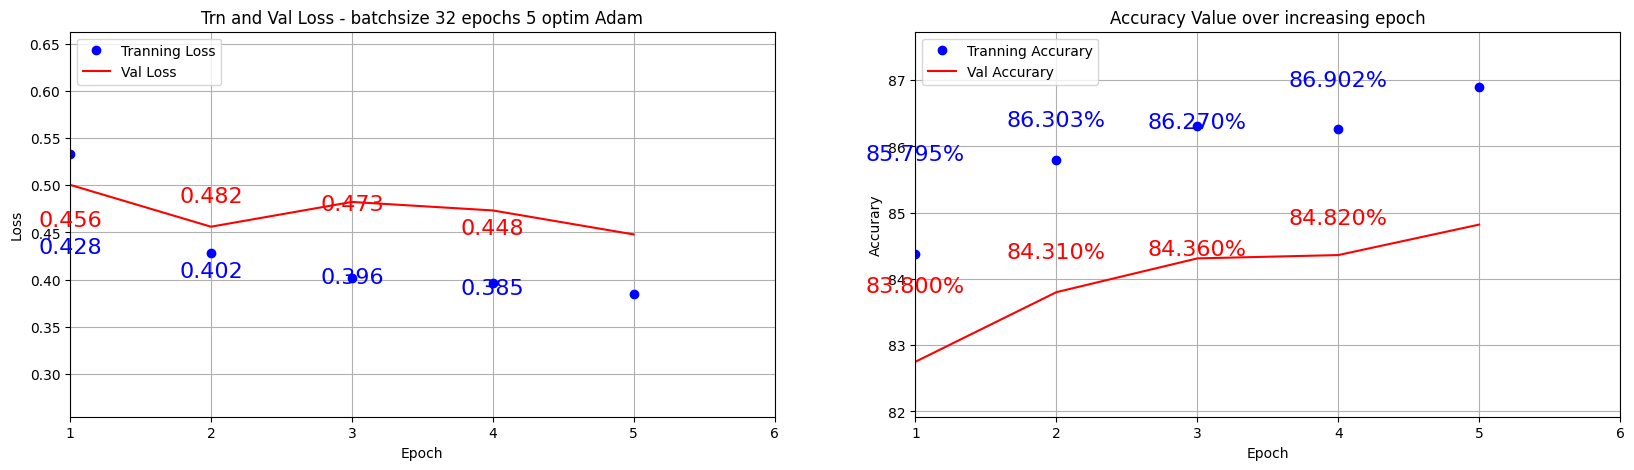

---------------------------------------------
All epochs:  [1 2 3 4 5]
All Training Loss: 0.898, 0.387, 0.351, 0.321, 0.305
All ValLosses: 0.454, 0.393, 0.384, 0.366, 0.365
All Training Accuracy: 85.023%, 87.592%, 87.960%, 88.945%, 89.222%
All ValAccuracy: 83.610%, 86.100%, 85.950%, 86.930%, 86.820%
---------------------------------------------
Training Loss: 0.305, ValLosses: 0.365
Training Accuracy: 89.222%, ValAccuracy: 86.820%
---------------------------------------------


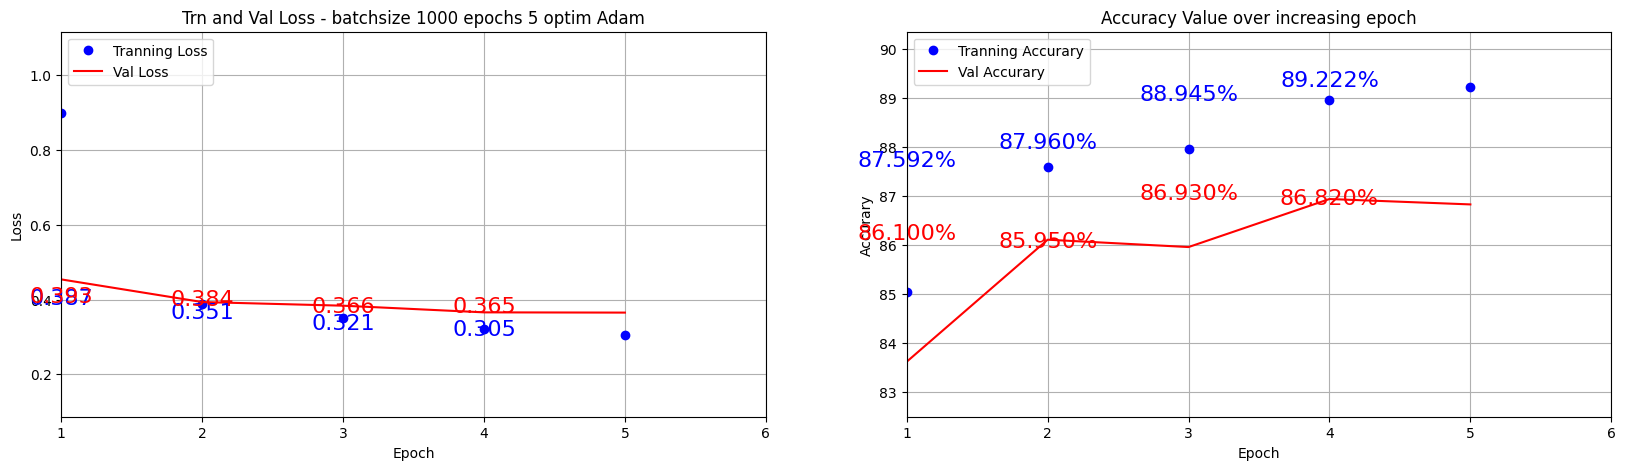

---------------------------------------------
All epochs:  [1 2 3 4 5]
All Training Loss: 3.613, 1.260, 0.727, 0.607, 0.535
All ValLosses: 2.081, 0.813, 0.668, 0.595, 0.540
All Training Accuracy: 42.303%, 68.733%, 76.393%, 79.392%, 81.913%
All ValAccuracy: 41.910%, 67.890%, 74.870%, 78.090%, 80.680%
---------------------------------------------
Training Loss: 0.535, ValLosses: 0.540
Training Accuracy: 81.913%, ValAccuracy: 80.680%
---------------------------------------------


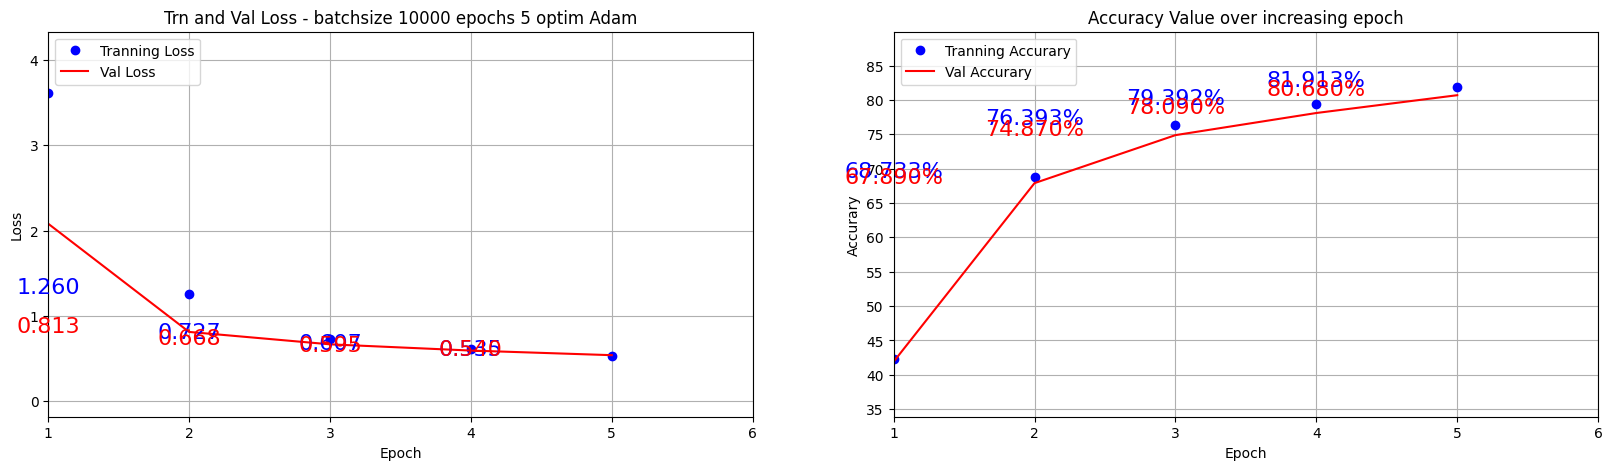

In [ ]:
from datetime import datetime
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import numpy as np

if 'get_model' not in globals():
  raise Exception("请先运行6.0加载基础函数")

def get_model(lr):
  model = nn.Sequential(
      nn.Linear(28*28, 1000),
      nn.ReLU(),
      nn.Linear(1000,10)
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()
  # 换个优化器玩
  optimizer = Adam(model.parameters(), lr=lr)
  return model, loss_fn, optimizer

def train_batch(x, y, model, optimizer, loss_fn):
  model.train()
  prediction = model(x)
  batch_loss = loss_fn(prediction, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

def accuracy(x, y, model):
  model.eval()
  with torch.no_grad():
    prediction = model(x)
  max_value, argmaxes = prediction.max(-1)
  is_correct = argmaxes == y
  return is_correct.cpu().numpy().tolist()

# 计算验证数据损失的函数
@torch.no_grad()
def val_loss(x, y, model):
  model.eval()
  prediction = model(x)
  val_loss = loss_fn(prediction, y)
  return val_loss.item()


# 学习5轮
def start(model, optimizer, loss_fn, *, batch_size: int, epochs: int, is_scale: bool):
  trn_dl, val_dl = get_data(batch_size=batch_size, is_scale=is_scale) # 缩放数据

  train_losses, train_accuracies = [], []
  val_losses, val_accuracies = [], []
  for epoch in range(epochs):
    #print(f'epoch: {epoch}')
    train_epoch_losses, train_epoch_accuracies = [], []

    for ix, batch in enumerate(iter(trn_dl)):
      x, y = batch
      batch_loss = train_batch(x, y, model, optimizer, loss_fn)
      train_epoch_losses.append(batch_loss)
    train_epoch_losse = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
      x, y = batch
      is_correct = accuracy(x, y, model)
      train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    # 计算单批次验证数据的损失和准确度
    for ix, batch in enumerate(iter(val_dl)):
      x, y = batch
      val_is_correct = accuracy(x, y, model)
      validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_losse)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

  # 输出loss和accuracy图
  show_result(epochs, train_losses, val_losses, train_accuracies, val_accuracies, batch_size=batch_size)


print(datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


# batch_size: 32, epochs = 5
model, loss_fn, optimizer = get_model(1e-2)
start(model, optimizer, loss_fn, batch_size=32, epochs=5, is_scale=True)

# batch_size: 1000, epochs = 5
model, loss_fn, optimizer = get_model(1e-2)
start(model, optimizer, loss_fn, batch_size=1000, epochs=5, is_scale=True)

# batch_size: 10000, epochs = 5
model, loss_fn, optimizer = get_model(1e-2)
start(model, optimizer, loss_fn, batch_size=10000, epochs=5, is_scale=True)


## 7. 不同优化器的影响
本节我们对比下SGD和Ada, 我们做一些调整看下效果如何
- 把优化器换成SGD,
- 批次使用32
- epoch改为8轮

这里我们使用上一节6中的代码进行测试

#### 实验结果

Training Loss: , ValLosses:
Training Accuracy: , ValAccuracy:

| 数据 | 优化方法 | train loss | val loss | trn accuracy | val accuracy |
|:--:|:----------:|:----------:|:--------:|:----------:|:------------:|
| 缩放 |     SGD  |   0.397     |  0.427 |    86.645%   |   85.000%   |
| 缩放 |    Adam  |   0.371     |  0.438  |   87.398%   |   84.870%   |

使用SDG和Adam能够达成的准确率都在85%左右，差别不是很大


#### TODO:
重复的代码已经写了很多遍了，我们重构下代码结构吧
或许，我们可以重构一下代码结构了
这里我们汇总一下可以调整的参数，然后调整下结构，方便测试不同参数下的表现
- 数据: 训练集，验证集
- 数据batch size
- 模型
- 损失函数
- 优化函数
- 学习率lr
- epoch数量

---------------------------------------------
All epochs:  [1 2 3 4 5 6 7 8]
All Training Loss: 0.842, 0.537, 0.483, 0.455, 0.436, 0.421, 0.408, 0.396
All ValLosses: 0.605, 0.526, 0.493, 0.472, 0.466, 0.440, 0.440, 0.431
All Training Accuracy: 80.375%, 82.987%, 84.058%, 84.957%, 85.035%, 86.043%, 85.972%, 86.503%
All ValAccuracy: 79.390%, 81.730%, 82.850%, 83.660%, 83.300%, 84.500%, 84.530%, 84.800%
---------------------------------------------
Training Loss: 0.396, ValLosses: 0.431
Training Accuracy: 86.503%, ValAccuracy: 84.800%
---------------------------------------------


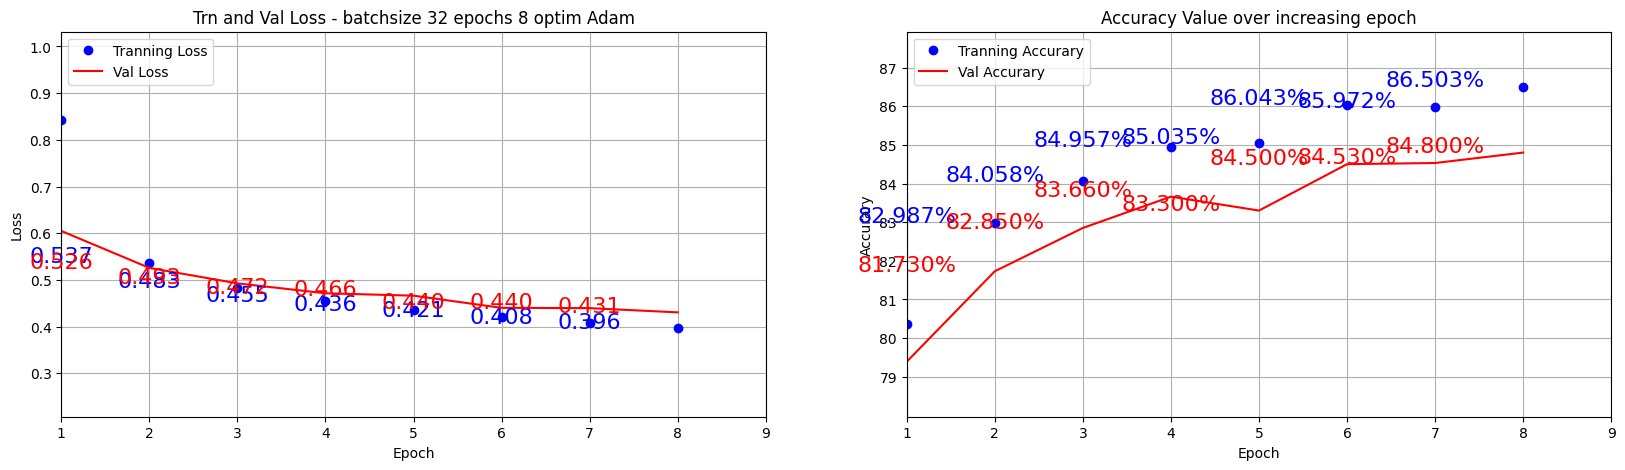

---------------------------------------------
All epochs:  [1 2 3 4 5 6 7 8]
All Training Loss: 0.566, 0.435, 0.415, 0.396, 0.391, 0.379, 0.378, 0.368
All ValLosses: 0.460, 0.474, 0.508, 0.470, 0.465, 0.452, 0.452, 0.480
All Training Accuracy: 85.643%, 85.410%, 84.110%, 86.108%, 85.868%, 86.647%, 87.660%, 87.378%
All ValAccuracy: 83.710%, 83.300%, 81.960%, 84.340%, 84.060%, 84.320%, 85.110%, 84.610%
---------------------------------------------
Training Loss: 0.368, ValLosses: 0.480
Training Accuracy: 87.378%, ValAccuracy: 84.610%
---------------------------------------------


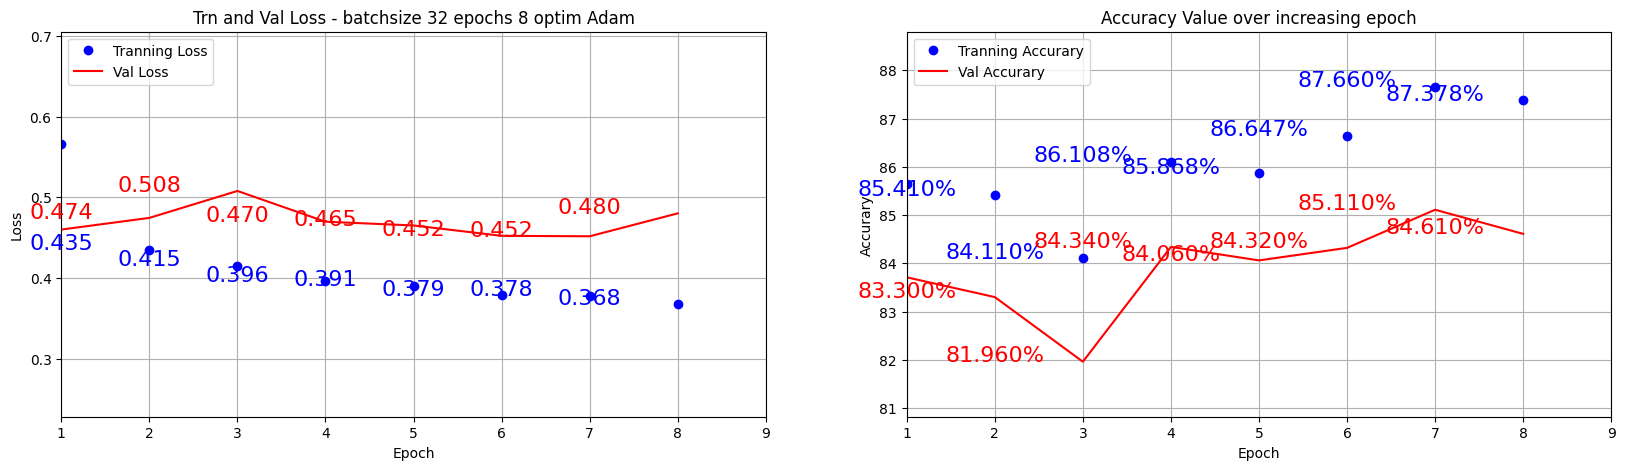

In [ ]:
def get_model():
  model = nn.Sequential(
      nn.Linear(28*28, 1000),
      nn.ReLU(),
      nn.Linear(1000,10)
  ).to(device)
  loss_fn = nn.CrossEntropyLoss()

  return model, loss_fn

model, loss_fn = get_model()

# 优化器SGD
start(model, SGD(model.parameters(), lr=1e-2), loss_fn, batch_size=32, epochs=8, is_scale=True)

# 优化器Adam
start(model, Adam(model.parameters(), lr=1e-2), loss_fn, batch_size=32, epochs=8, is_scale=True)



## 8. 不同学习率的影响
以上训练都是在learning rate=1e-2下进行的。

学习旅较小时候，权重逐渐向最优值移动；当学习率过大时候，权重值可能出现震荡

#### 本节讨论一下问题
- 缩放数据集上使用较大的学习率 (1e-1 = 0.1)
- 缩放数据集上使用较小的学习率 (1e-2 = 0.01)
- 缩放数据集上使用较小的学习率 (1e-3 = 0.001)
- 缩放数据集上使用较小的学习率 (1e-4 = 0.0001)
- 缩放数据集上使用较小的学习率 (1e-5 = 0.00001)
- 非缩放数据集上使用较大的学习率 (0.1)
- 非缩放数据集上使用较小的学习率 (1e-5 = 0.00001)

对比学习率对缩放非缩放数据的影响

#### 实验结果

| 数据 | lr.|epochs|train loss|val loss.|trn accuracy|val accuracy|
| :---:| :---: | :---: | :---: | :---:      | :---: | :---:      |
| 缩放  | 1e-1  |10|0.252|0.329|91.643%|88.420%|
| 缩放  | 1e-2  |10|0.377|0.417|86.897%|85.280%|
| 缩放  | 1e-3  |10|0.580|0.595|81.298%|79.890%|
| 缩放  | 1e-4  |10|1.313|1.289|66.520%|65.600%|
| 缩放  | 1e-5  |10|2.175|2.168|40.307%|40.130%|

很明显，收敛速度越来越慢了。

结论:
- 学习率变小，收敛时间变长

那么学习率1e-5时候，opochs=50会怎么样呢？

epochs = 50，100时候, 学习率从1e-1到1e-5，准确率从88.420%降低到40.130%

| 数据 | lr.|epochs|train loss|val loss.|trn accuracy|val accuracy|
| :---:| :---: | :---: | :---: | :---:      | :---: | :---:      |
| 缩放  | 1e-5  |50 |1.684|1.683|63.740%|62.630%|
| 缩放  | 1e-5  |100|1.281|1.285|66.348%|65.490%|

1e-15时候效果反而变差了


那么学习率1e-3时候，opochs=50会怎么样呢？

| 数据 | lr.|epochs|train loss|val loss.|trn accuracy|val accuracy|
| :---:| :---: | :---: | :---: | :---:      | :---: | :---:      |
| 缩放  | 1e-2  |50|0.227|0.322|92.243%|88.680%|
| 缩放  | 1e-3  |100|0.363|0.407|87.487%|85.780%|


1e-2表现更好一些

lr = 0.1 opechs = 10
---------------------------------------------
All epochs:  [ 1  2  3  4  5  6  7  8  9 10]
All Training Loss: 0.540, 0.393, 0.353, 0.328, 0.309, 0.294, 0.281, 0.269, 0.260, 0.250
All ValLosses: 0.432, 0.432, 0.406, 0.359, 0.341, 0.352, 0.336, 0.325, 0.358, 0.327
All Training Accuracy: 86.073%, 85.717%, 87.102%, 89.007%, 89.972%, 89.848%, 90.710%, 91.090%, 89.595%, 91.428%
All ValAccuracy: 84.360%, 84.580%, 85.210%, 86.940%, 87.830%, 87.350%, 88.370%, 88.170%, 86.620%, 88.250%
---------------------------------------------
Training Loss: 0.250, ValLosses: 0.327
Training Accuracy: 91.428%, ValAccuracy: 88.250%
---------------------------------------------


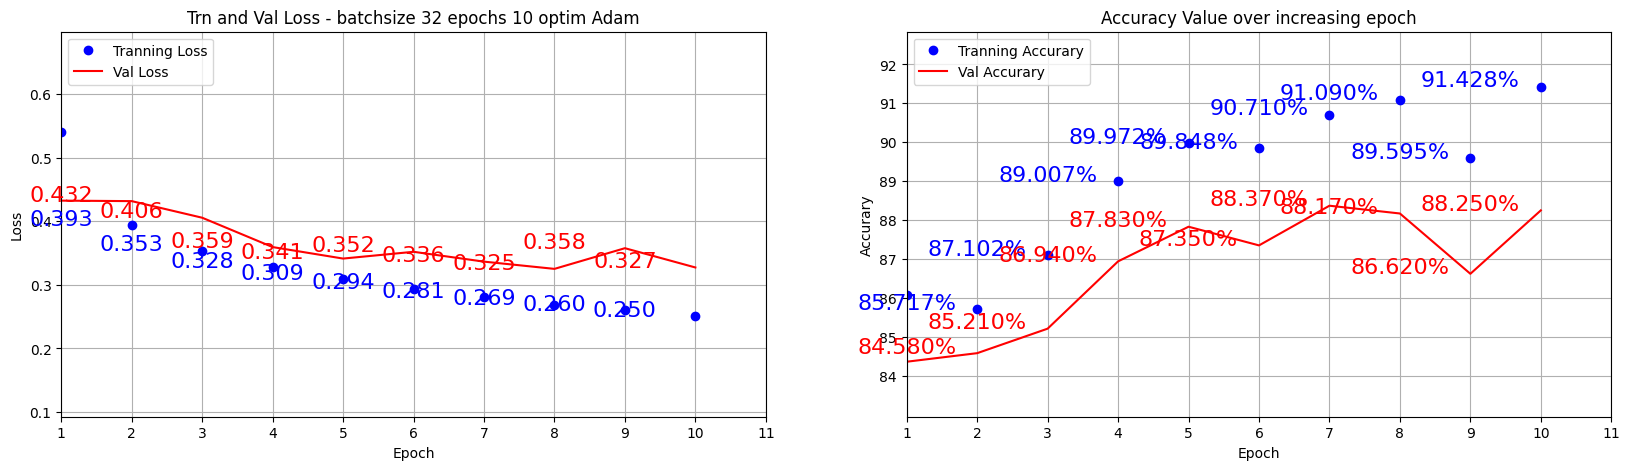

lr = 0.01 opechs = 10
---------------------------------------------
All epochs:  [ 1  2  3  4  5  6  7  8  9 10]
All Training Loss: 0.842, 0.537, 0.482, 0.454, 0.435, 0.419, 0.406, 0.395, 0.385, 0.376
All ValLosses: 0.602, 0.523, 0.491, 0.474, 0.459, 0.442, 0.438, 0.427, 0.426, 0.411
All Training Accuracy: 80.722%, 83.212%, 84.150%, 84.902%, 85.298%, 85.965%, 86.230%, 86.628%, 86.627%, 87.235%
All ValAccuracy: 79.290%, 81.810%, 82.620%, 83.740%, 83.700%, 84.470%, 84.690%, 84.990%, 84.710%, 85.670%
---------------------------------------------
Training Loss: 0.376, ValLosses: 0.411
Training Accuracy: 87.235%, ValAccuracy: 85.670%
---------------------------------------------


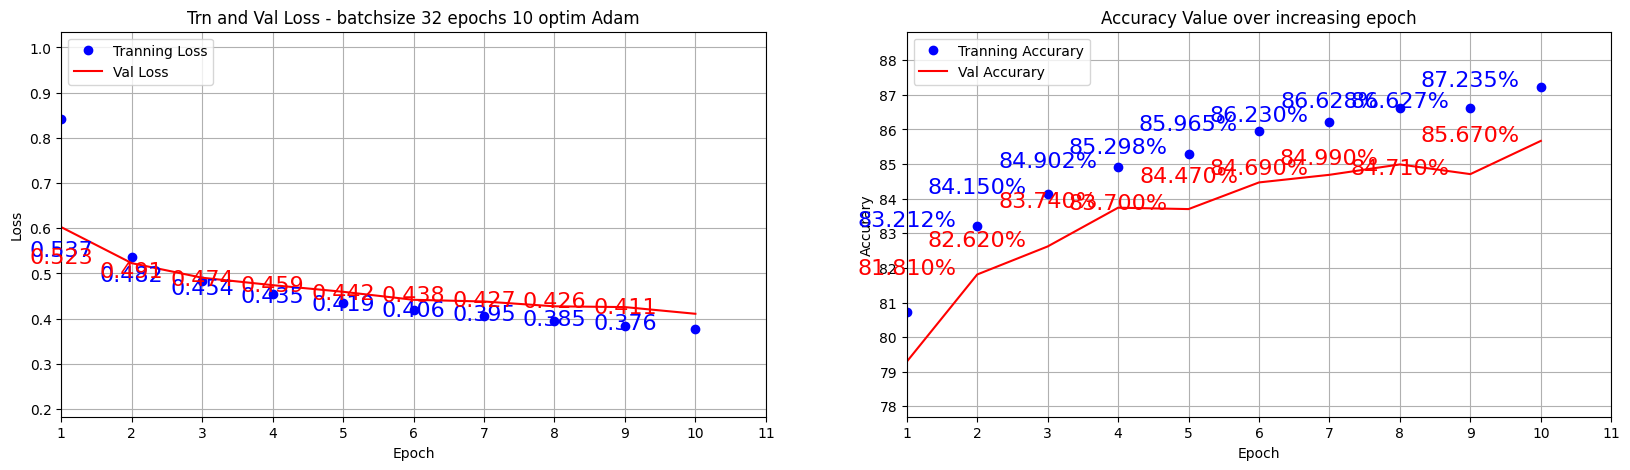

lr = 0.001 opechs = 10
---------------------------------------------
All epochs:  [ 1  2  3  4  5  6  7  8  9 10]
All Training Loss: 1.729, 1.087, 0.878, 0.782, 0.722, 0.680, 0.648, 0.622, 0.601, 0.583
All ValLosses: 1.293, 0.962, 0.835, 0.764, 0.718, 0.680, 0.653, 0.631, 0.612, 0.596
All Training Accuracy: 66.297%, 69.587%, 73.290%, 75.288%, 77.050%, 78.227%, 79.092%, 79.795%, 80.622%, 81.040%
All ValAccuracy: 65.440%, 68.220%, 71.880%, 73.740%, 75.380%, 76.650%, 77.670%, 78.560%, 79.210%, 79.550%
---------------------------------------------
Training Loss: 0.583, ValLosses: 0.596
Training Accuracy: 81.040%, ValAccuracy: 79.550%
---------------------------------------------


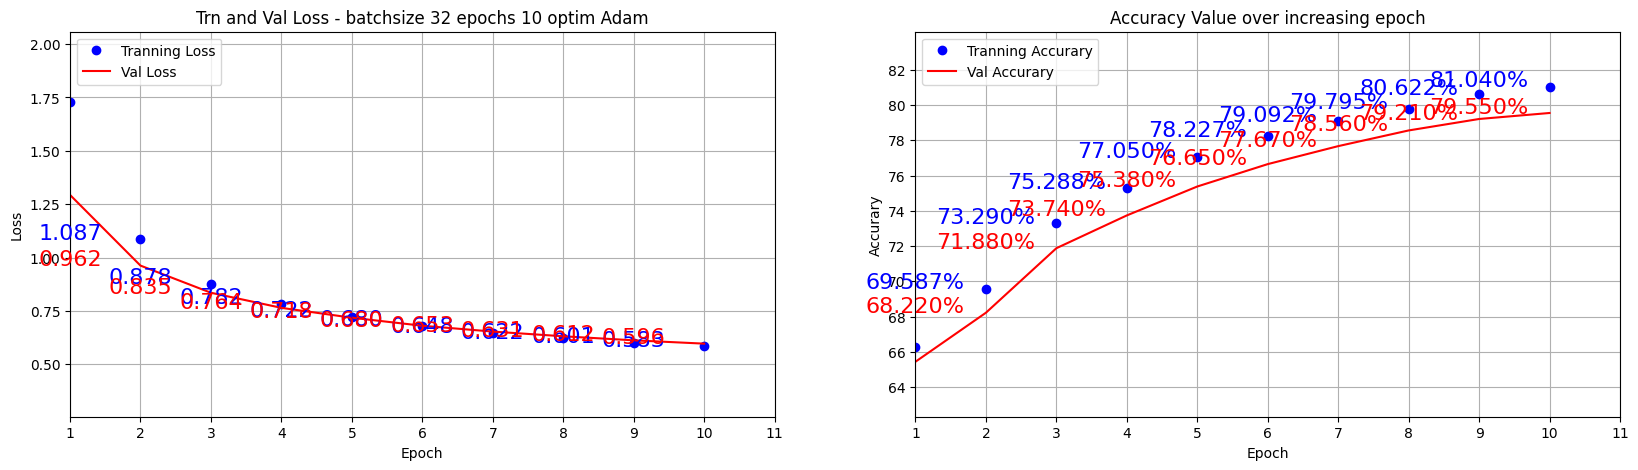

lr = 0.0001 opechs = 10
---------------------------------------------
All epochs:  [ 1  2  3  4  5  6  7  8  9 10]
All Training Loss: 2.233, 2.095, 1.973, 1.856, 1.743, 1.637, 1.540, 1.453, 1.377, 1.310
All ValLosses: 2.160, 2.034, 1.916, 1.802, 1.692, 1.591, 1.500, 1.419, 1.349, 1.287
All Training Accuracy: 51.340%, 62.418%, 64.338%, 65.383%, 65.765%, 65.907%, 66.080%, 66.240%, 66.340%, 66.405%
All ValAccuracy: 51.290%, 61.660%, 63.490%, 64.420%, 64.670%, 64.710%, 64.820%, 65.030%, 65.140%, 65.300%
---------------------------------------------
Training Loss: 1.310, ValLosses: 1.287
Training Accuracy: 66.405%, ValAccuracy: 65.300%
---------------------------------------------


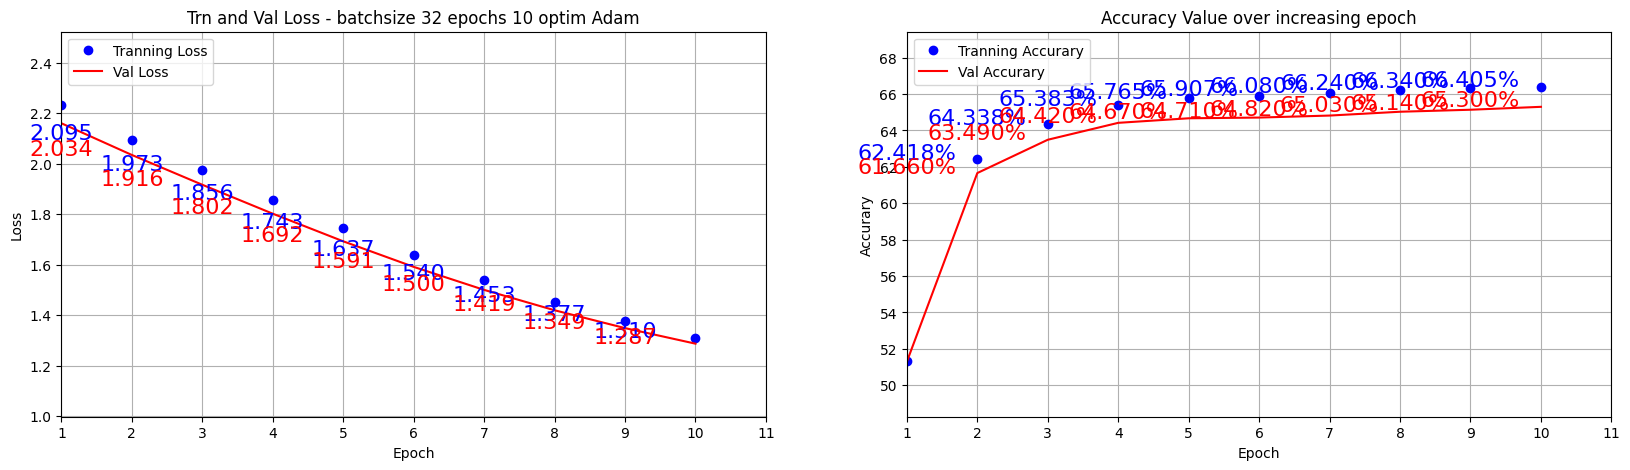

lr = 1e-05 opechs = 10
---------------------------------------------
All epochs:  [ 1  2  3  4  5  6  7  8  9 10]
All Training Loss: 2.283, 2.267, 2.252, 2.236, 2.222, 2.207, 2.193, 2.179, 2.165, 2.152
All ValLosses: 2.275, 2.259, 2.244, 2.229, 2.215, 2.200, 2.186, 2.173, 2.159, 2.146
All Training Accuracy: 16.932%, 20.690%, 24.065%, 27.218%, 31.170%, 35.248%, 38.378%, 40.587%, 42.202%, 43.700%
All ValAccuracy: 17.910%, 21.300%, 24.480%, 27.360%, 31.300%, 35.340%, 38.420%, 40.340%, 41.940%, 43.190%
---------------------------------------------
Training Loss: 2.152, ValLosses: 2.146
Training Accuracy: 43.700%, ValAccuracy: 43.190%
---------------------------------------------


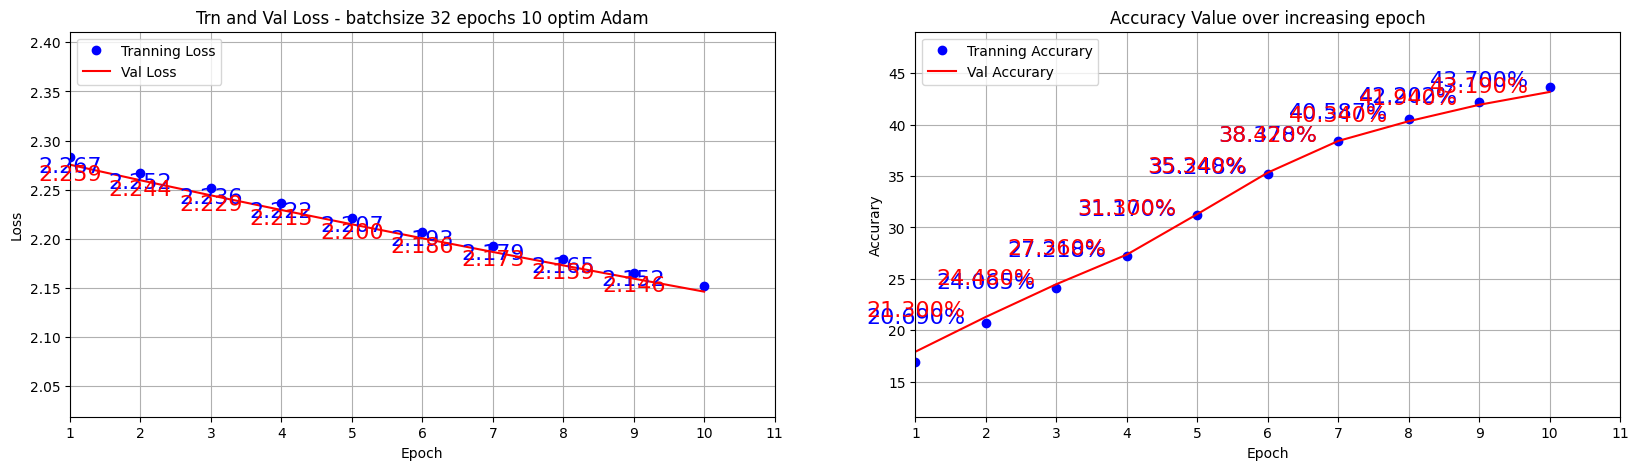

lr = 1e-05 opechs = 50
---------------------------------------------
All epochs:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
All Training Loss: 2.309, 2.293, 2.278, 2.263, 2.249, 2.235, 2.222, 2.209, 2.196, 2.183, 2.171, 2.158, 2.146, 2.134, 2.122, 2.110, 2.098, 2.087, 2.075, 2.063, 2.052, 2.040, 2.028, 2.017, 2.005, 1.994, 1.982, 1.970, 1.959, 1.947, 1.936, 1.924, 1.913, 1.901, 1.890, 1.879, 1.867, 1.856, 1.844, 1.833, 1.822, 1.811, 1.799, 1.788, 1.777, 1.766, 1.755, 1.744, 1.733, 1.722
All ValLosses: 2.301, 2.285, 2.271, 2.256, 2.243, 2.229, 2.216, 2.203, 2.190, 2.178, 2.165, 2.153, 2.141, 2.129, 2.117, 2.106, 2.094, 2.082, 2.071, 2.059, 2.047, 2.036, 2.024, 2.013, 2.001, 1.990, 1.978, 1.967, 1.956, 1.944, 1.933, 1.921, 1.910, 1.899, 1.887, 1.876, 1.865, 1.853, 1.842, 1.831, 1.820, 1.808, 1.797, 1.786, 1.775, 1.764, 1.753, 1.742, 1.732, 1.721
All Training Accuracy: 11.592%, 

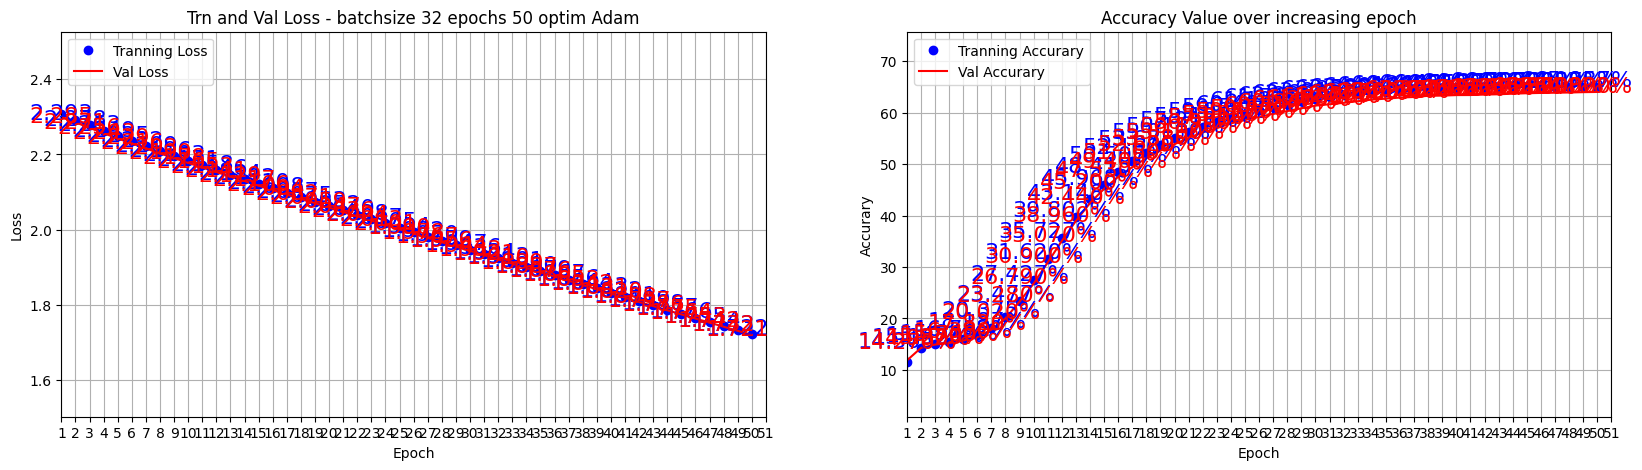

lr = 1e-05 opechs = 100
---------------------------------------------
All epochs:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
All Training Loss: 2.304, 2.287, 2.270, 2.255, 2.240, 2.225, 2.211, 2.197, 2.184, 2.171, 2.158, 2.145, 2.132, 2.120, 2.107, 2.095, 2.083, 2.071, 2.059, 2.047, 2.035, 2.023, 2.011, 1.999, 1.988, 1.976, 1.964, 1.952, 1.941, 1.929, 1.917, 1.906, 1.894, 1.883, 1.871, 1.860, 1.848, 1.837, 1.826, 1.814, 1.803, 1.792, 1.781, 1.769, 1.758, 1.747, 1.736, 1.725, 1.715, 1.704, 1.693, 1.683, 1.672, 1.662, 1.651, 1.641, 1.631, 1.621, 1.611, 1.601, 1.591, 1.581, 1.572, 1.562, 1.553, 1.544, 1.534, 1.525, 1.516, 1.508, 1

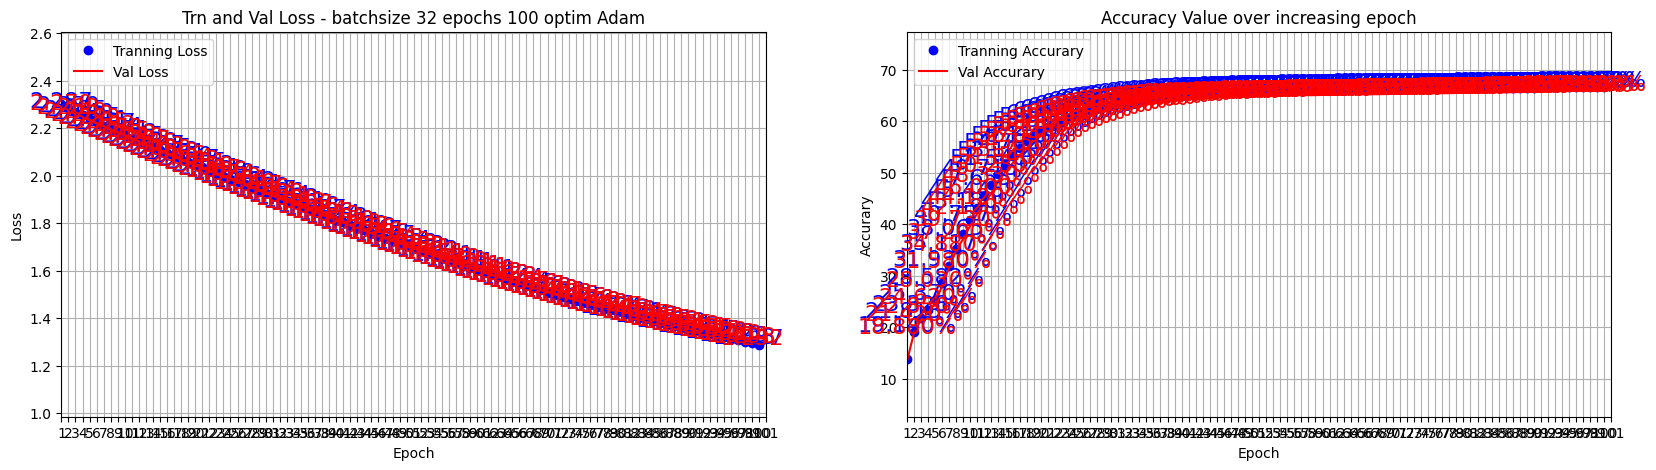

lr = 0.01 opechs = 50
---------------------------------------------
All epochs:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
All Training Loss: 0.842, 0.537, 0.483, 0.454, 0.434, 0.420, 0.406, 0.396, 0.386, 0.377, 0.369, 0.362, 0.355, 0.349, 0.343, 0.337, 0.332, 0.328, 0.322, 0.318, 0.313, 0.309, 0.305, 0.302, 0.297, 0.293, 0.290, 0.287, 0.283, 0.280, 0.277, 0.274, 0.271, 0.268, 0.265, 0.262, 0.259, 0.257, 0.254, 0.251, 0.249, 0.247, 0.244, 0.241, 0.239, 0.237, 0.234, 0.232, 0.229, 0.227
All ValLosses: 0.609, 0.529, 0.492, 0.476, 0.455, 0.445, 0.439, 0.431, 0.421, 0.415, 0.402, 0.402, 0.391, 0.387, 0.396, 0.382, 0.387, 0.373, 0.373, 0.368, 0.363, 0.372, 0.358, 0.361, 0.358, 0.355, 0.355, 0.351, 0.348, 0.347, 0.347, 0.356, 0.339, 0.340, 0.335, 0.332, 0.331, 0.330, 0.334, 0.333, 0.326, 0.327, 0.324, 0.322, 0.326, 0.332, 0.325, 0.353, 0.320, 0.321
All Training Accuracy: 80.788%, 8

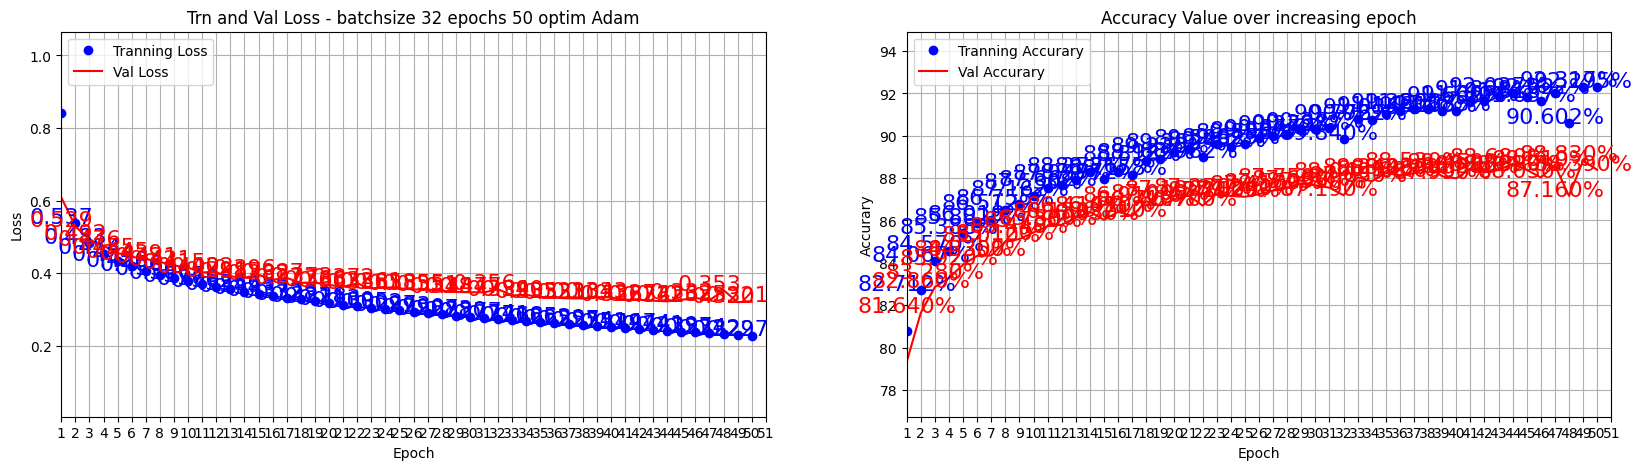

lr = 0.001 opechs = 100
---------------------------------------------
All epochs:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
All Training Loss: 1.742, 1.092, 0.882, 0.786, 0.727, 0.684, 0.652, 0.626, 0.604, 0.586, 0.571, 0.558, 0.547, 0.537, 0.528, 0.520, 0.513, 0.507, 0.501, 0.495, 0.490, 0.485, 0.481, 0.477, 0.473, 0.470, 0.466, 0.463, 0.460, 0.457, 0.454, 0.452, 0.449, 0.447, 0.445, 0.442, 0.440, 0.438, 0.436, 0.434, 0.432, 0.430, 0.428, 0.427, 0.425, 0.423, 0.422, 0.420, 0.418, 0.417, 0.415, 0.414, 0.412, 0.411, 0.410, 0.408, 0.407, 0.406, 0.404, 0.403, 0.402, 0.401, 0.399, 0.398, 0.397, 0.396, 0.395, 0.393, 0.392, 0.391, 0

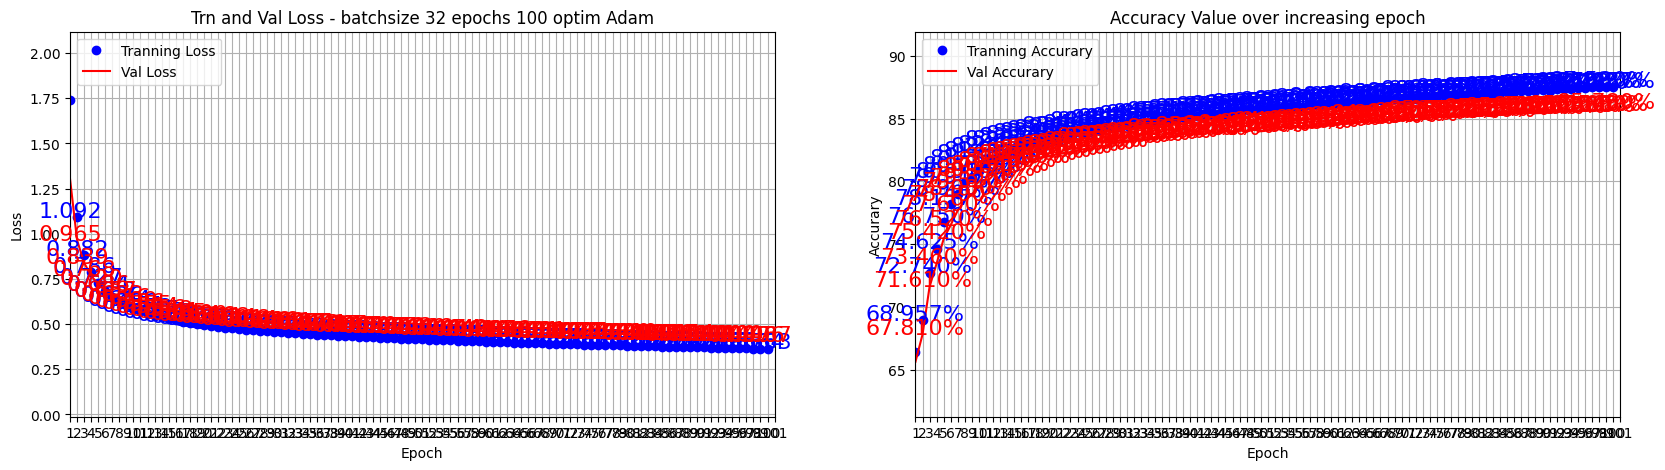

In [ ]:
params = [
  (1e-1, 10), (1e-2, 10), (1e-3, 10), (1e-4, 10), (1e-5, 10),
  (1e-5, 50), (1e-5, 100),
  (1e-2, 50), (1e-3, 100),
]

for lr, epochs in params:
  model, loss_fn = get_model()
  print(f'lr = {lr} opechs = {epochs}')
  start(model, SGD(model.parameters(), lr=lr), loss_fn, batch_size=32, epochs=epochs, is_scale=True)




## 9. 不同学习率衰减的影响
以上实现中，学习率都是固定不变的。实际上，学习初期权重损失很高，后期损失则递减。因此我们的学习率也应该从大到小递减。

解决方案：持续监测验证损失，如果验证损失没有减小，就降低学习率。可以用lr_scheduler方法

再来完整的实现一次吧！For The Union

##### 实验结果
确实learning rate减小速度在慢慢放缓



/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 0: Current LR = 0.001
Epoch 1: Current LR = 0.0005
Epoch 2: Current LR = 0.0005
Epoch 3: Current LR = 0.0005
Epoch 4: Current LR = 0.00025
Epoch 5: Current LR = 0.00025
Epoch 6: Current LR = 0.000125
Epoch 7: Current LR = 6.25e-05
Epoch 8: Current LR = 6.25e-05
Epoch 9: Current LR = 3.125e-05
Epoch 10: Current LR = 1.5625e-05
Epoch 11: Current LR = 1e-05
Epoch 12: Current LR = 1e-05
Epoch 13: Current LR = 1e-05
Epoch 14: Current LR = 1e-05
Epoch 15: Current LR = 1e-05
Epoch 16: Current LR = 1e-05
Epoch 17: Current LR = 1e-05
Epoch 18: Current LR = 1e-05
Epoch 19: Current LR = 1e-05
---------------------------------------------
All epochs:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
All Training Loss: 0.476, 0.357, 0.295, 0.276, 0.260, 0.230, 0.220, 0.201, 0.191, 0.187, 0.182, 0.178, 0.177, 0.176, 0.176, 0.175, 0.174, 0.174, 0.173, 0.173
All ValLosses: 0.401, 0.432, 0.338, 0.326, 0.321, 0.308, 0.306, 0.309, 0.298, 0.297, 0.297, 0.296, 0.296, 0.296, 0.296, 0.296,

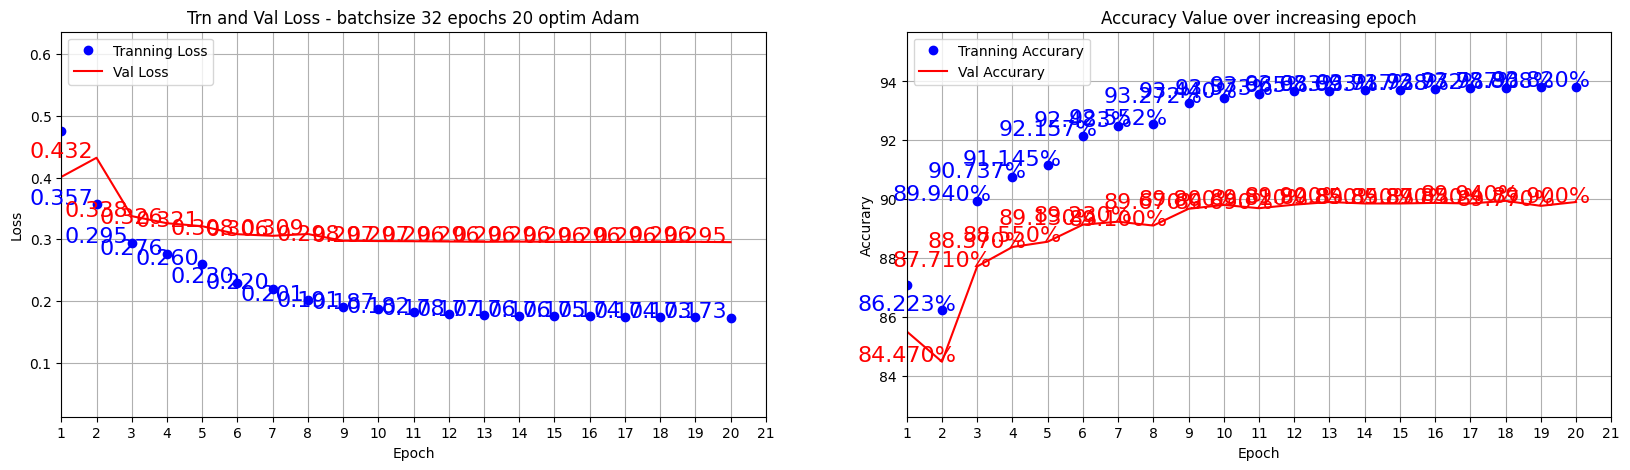

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


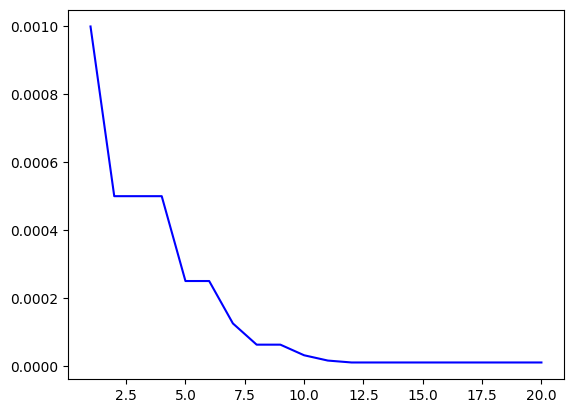

In [ ]:
from torch import optim

batch_size = 32

model, loss_fn = get_model()

trn_dl, val_dl = get_data(batch_size=batch_size, is_scale=True)

optimizer = Adam(model.parameters(), lr=1e-3)

# 定义lr scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    factor=0.5,
    patience=0,
    threshold=0.01,
    verbose=True,
    min_lr=1e-5,
    threshold_mode='abs'
)

def train_batch(x, y, model, optimizer, loss_fn):
  model.train()
  prediction = model(x)
  batch_loss = loss_fn(prediction, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()


train_losses, train_accuracies =[], []
val_losses, val_accuracies =[], []
lr_histories = []
epochs = 20
for epoch in range(epochs):
  train_epoch_losses, train_epoch_accuracies = [], []

  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, loss_fn)
    train_epoch_losses.append(batch_loss)
  train_epoch_loss = np.array(train_epoch_losses).mean()

  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    is_correct = accuracy(x, y, model)
    train_epoch_accuracies.extend(is_correct)
  train_epoch_accuracy = np.mean(train_epoch_accuracies)

  for ix, batch in enumerate(iter(val_dl)):
    x, y = batch
    val_is_correct = accuracy(x, y, model)
    validation_loss = val_loss(x, y, model)
    scheduler.step(validation_loss)   # 使用lr scheduler
  print(f"Epoch {epoch}: Current LR = {optimizer.param_groups[0]['lr']}")
  lr_histories.append(optimizer.param_groups[0]['lr'])
  val_epoch_accuracy = np.mean(val_is_correct)


  # 保存
  train_losses.append(train_epoch_loss)
  train_accuracies.append(train_epoch_accuracy)
  val_losses.append(validation_loss)
  val_accuracies.append(val_epoch_accuracy)

# 输出loss和accuracy图
show_result(epochs, train_losses, val_losses, train_accuracies, val_accuracies, batch_size=batch_size)

# 输出lr变化线
print(np.arange(len(lr_histories))+1)
plt.plot(np.arange(len(lr_histories))+1, lr_histories, 'b-')


## 10. 构建更深的神经网络
到目前为止，我们的网络架构都只有一个隐藏层。本节我们将对比有两个隐藏层和没有隐藏层的模型性能
- 有两个隐藏层
- 没有隐藏层


In [3]:
from torchvision import datasets
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torch.optim import SGD
%matplotlib inline

def get_model_2_hidden_layer():
  model = nn.Sequential(
      nn.Linear(28*28, 1000),
      nn.ReLU(),
      nn.Linear(1000, 1000),
      nn.ReLU(),
      nn.Linear(1000, 10)
  ).to(device)
  pass

def get_model_no_hidden_layer():
  model = nn.Sequential(
      nn.Linear(28*28, 10)
  ).to(device)
  pass

def train_batch(x, y, model, optimizer, loss_fn):
  # 将模型切换至训练模式，启用训练专用层（如Dropout、BatchNorm）
  # Dropout层会随机丢弃神经元，防止过拟合
  # BatchNorm层使用当前批次统计量（均值/方差）而非训练集全局统计量，确保参数随数据动态更新
  model.train()

  # 向前传播，逐层计算，生成预测值prediction
  # 调用模型的forward()方法（用户自定义或PyTorch内置）。
  # 例如卷积网络中的卷积、激活、池化操作，最终输出预测结果
  prediction = model(x)

  # 量化模型预测值prediction与真实标签y的差异。
  # 常用损失函数
  #   分类任务：CrossEntropyLoss（结合Softmax与负对数似然）
  #   回归任务：MSELoss（均方误差）
  batch_loss = loss_fn(prediction, y)

  # 反向传播：沿计算图自动计算模型参数的梯度
  # 此步骤是训练中最耗计算资源的环
  batch_loss.backward()

  # 根据梯度更新模型权重
  optimizer.step()

  # 清空所有参数的梯度缓存
  optimizer.zero_grad()

  # 提取损失值的Python浮点数
  return batch_loss.item()

def accuracy(x, y, model):
  # 将模型切换到评估模式
  # 禁用训练特有的层（如 Dropout、BatchNorm），确保推理时使用全局统计量而非批次统计量，
  # 避免预测结果因随机性失真
  # 若遗漏后果​​：
  #     模型可能因随机丢弃神经元（Dropout）或错误归一化（BatchNorm）导致预测不稳定。
  model.eval()

  # 创建无梯度计算上下文
  with torch.no_grad():
    prediction = model(x) # 向前传播，预测结果

  # 在最后一个维度（类别维度）取最大值及其索引
  # dim=-1：表示沿最后一个维度操作（即类别维度）。
  # max_values：存储对应类别的置信度分数（此函数未使用，可忽略）
  # argmaxes：存储每个样本预测类别的索引（形状 [batch_size]）
  # 若 prediction = [[0.2, 0.8], [0.9, 0.1]]，则 argmaxes = [1, 0]
  max_values, argmaxes = prediction.max(-1)

  # 生成布尔张量，标记每个样本是否预测正确
  # 输出​​：布尔张量（如 [True, False, True]），True 表示预测正确
  is_correct = argmaxes == y
  return is_correct.cpu().numpy().tolist()


@torch.no_grad()
def val_loss(x, y, model):
  prediction = model(x)
  val_loss = loss_fn(prediction, y)
  return val_loss.item()

def run():
  train_losses, train_accur

trn_dl, val_dl = get_data(batch_size=32, is_scale=True)
mode, loss_fn, optimizer = get_model_2_hidden_layer()


NameError: name 'get_data' is not defined

## 11. 不同批归一化的影响

12. 过拟合